## <font color='blue'>  Fait par : CHAIMAA ELALAMI:MSD1 </font>

## Imports

In [3]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D

import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [8]:
def solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j]
                 
                  vn[i][j] = v[i][j]
        for i in range(1,row - 1):
            for j in range(1,col - 1):
                u[i][j] = un[i][j] - un[i][j] * dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1]) + nu * dt / dx**2 * (un[i+1][j] - 2*un[i][j] + un[i - 1][j]) + nu * dt / dy**2 * (un[i][j+1] - 2*un[i][j] + un[i][j-1])
                v[i][j] = vn[i][j] - un[i][j] * dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1]) + nu * dt / dx**2 * (vn[i+1][j] - 2*vn[i][j] + vn[i - 1][j]) + nu * dt / dy**2 * (vn[i][j+1] - 2*vn[i][j] + vn[i][j-1])
                
        
        
    
    return 0

## Numba accelerator

In [6]:
@njit(fastmath=True)
def solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j]
                 
                  vn[i][j] = v[i][j]
        for i in range(1,row - 1):
            for j in range(1,col - 1):
                u[i][j] = un[i][j] - un[i][j] * dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1]) + nu * dt / dx**2 * (un[i+1][j] - 2*un[i][j] + un[i - 1][j]) + nu * dt / dy**2 * (un[i][j+1] - 2*un[i][j] + un[i][j-1])
                v[i][j] = vn[i][j] - un[i][j] * dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1]) + nu * dt / dx**2 * (vn[i+1][j] - 2*vn[i][j] + vn[i - 1][j]) + nu * dt / dy**2 * (vn[i][j+1] - 2*vn[i][j] + vn[i][j-1])
            
        
        
    return 0

## Pyccel accelerator

In [4]:
@types('float[:,:]','float[:,:]','float[:,:]','float[:,:]', 'int', 'float','float', 'float' , 'float')
def solve_2d_burger_pyccel(u, un, v, vn, nt, dt, dx, dy, nu):
    
    
    ###Assign initial conditions
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
    ##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
    v[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                  un[i][j] = u[i][j]
                 
                  vn[i][j] = v[i][j]
        for i in range(1,row - 1):
            for j in range(1,col - 1):
                u[i][j] = un[i][j] - un[i][j] * dt / dx * (un[i][j] - un[i - 1][j]) - vn[i][j] * dt / dy * (un[i][j] - un[i][j-1]) + nu * dt / dx**2 * (un[i+1][j] - 2*un[i][j] + un[i - 1][j]) + nu * dt / dy**2 * (un[i][j+1] - 2*un[i][j] + un[i][j-1])
                v[i][j] = vn[i][j] - un[i][j] * dt / dx * (vn[i][j] - vn[i - 1][j]) - vn[i][j] * dt / dy * (vn[i][j] - vn[i][j-1]) + nu * dt / dx**2 * (vn[i+1][j] - 2*vn[i][j] + vn[i - 1][j]) + nu * dt / dy**2 * (vn[i][j+1] - 2*vn[i][j] + vn[i][j-1])
            
        
        
        
    return 0

## Inputs

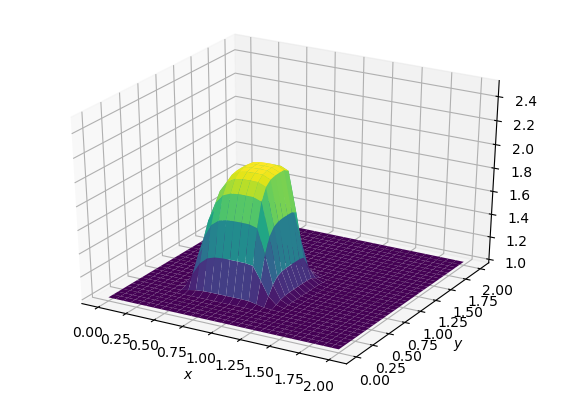

In [7]:
###variable declarations
nx = 31
ny = 31
nt = 120
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))  # create a 1xn vector of 1's
v = np.ones((ny, nx))
un = np.ones((ny, nx)) 
vn = np.ones((ny, nx))

solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

X, Y = np.meshgrid(x, y)
fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, u, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_zlim(1, 2.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

## Call Funtions

### Pure function

In [22]:
%timeit solve_2d_burger_pure(u, un, v, vn, nt, dt, dx, dy, nu)

936 ms ± 66.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Function with numba accelerator

In [23]:
%timeit solve_2d_burger_numba(u, un, v, vn, nt, dt, dx, dy, nu)

1.01 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Function with pyccel accelerator

In [24]:
solve_2d_burger_f90 = epyccel(solve_2d_burger_pyccel)

In [25]:
%timeit solve_2d_burger_f90(u, un, v, vn, nt, dt, dx, dy, nu)

453 µs ± 898 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
